Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import wosis
import pandas as pd
import metaknowledge as mk

# Helper functions for plotting
import wosis.analysis.plotting as wos_plot

# Analysis and search functions
from wosis.analysis import (preview_matches, search_records, keyword_matches, 
                            find_pubs_by_authors, preview_matches_by_keyword, get_unique_kw_titles,
                            remove_by_journals, remove_by_title)

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# This just helps make the plots look nicer
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2.0)

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("tmp/rest_requested_corpora.txt")
corpora_df = wosis.rc_to_df(RC)

In [4]:
wos_config = wosis.load_config('config.yml')

In [12]:
import pandas as pd

In [13]:
software_packages = pd.read_csv("../data/refined_software_packages_rest.csv")

In [15]:
software_rc = wosis.extract_recs(software_packages.loc[:, 'id'], RC, name='Software Packages')

Various analyses of the software data

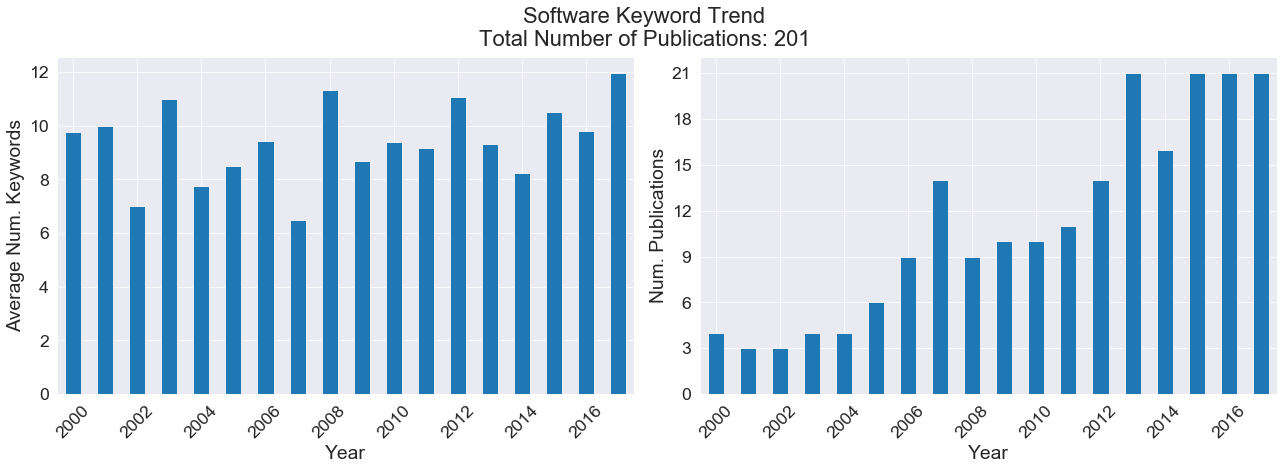

In [16]:
wos_plot.plot_kw_trend(software_rc, title='Software Keyword Trend', save_plot_fn='figs/software_kw_trend.png')

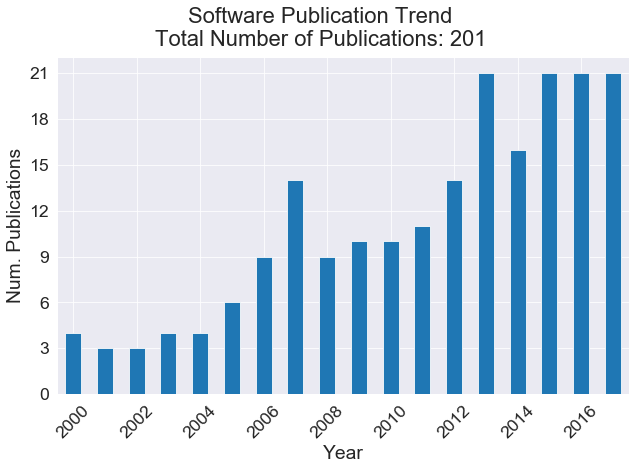

In [17]:
wos_plot.plot_pub_trend(software_rc, title='Software Publication Trend', save_plot_fn='figs/software_pub_trend.png')

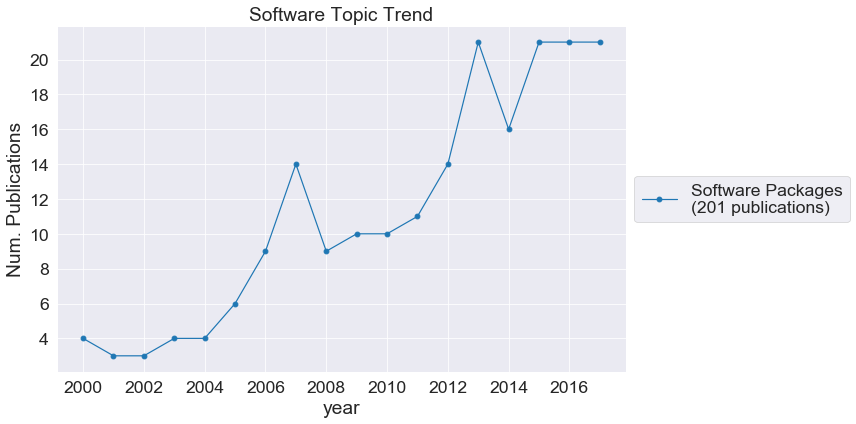

In [31]:
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Software Topic Trend', save_plot_fn='figs/software_topic_trend')

Some ideas for further analysis: <br>
- Which fields are using which packages
- Trend of UA/SA/optimization
    - and which fields are using which methods
- Networkx diagrams

In [21]:
UA = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [24]:
all_ua = UA.combine_recs()

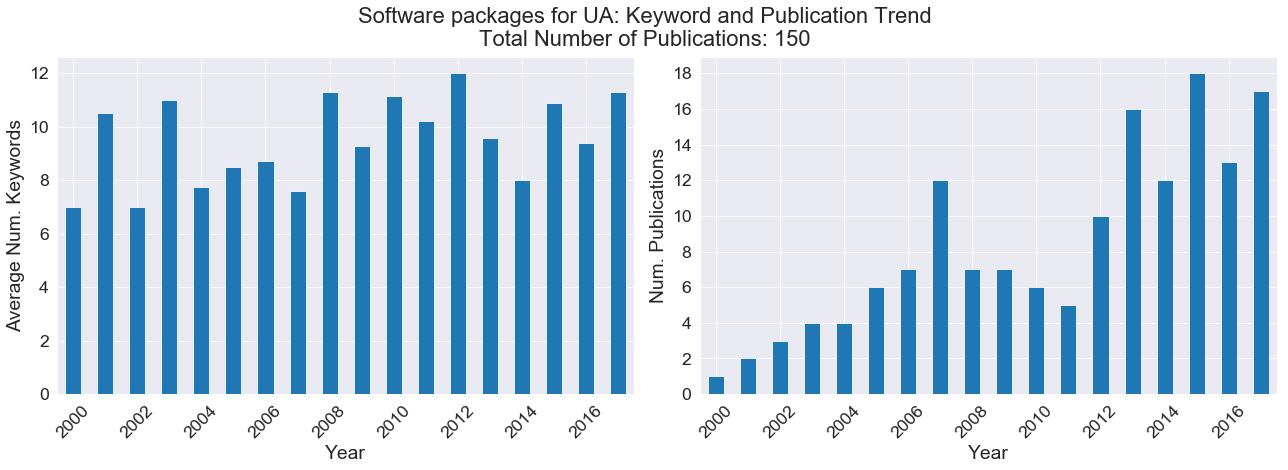

In [27]:
wos_plot.plot_kw_trend(all_ua, title='Software packages for UA: Keyword and Publication Trend', save_plot_fn='figs/ua_pub_trend.png')

In [22]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [25]:
all_sa = SA.combine_recs()

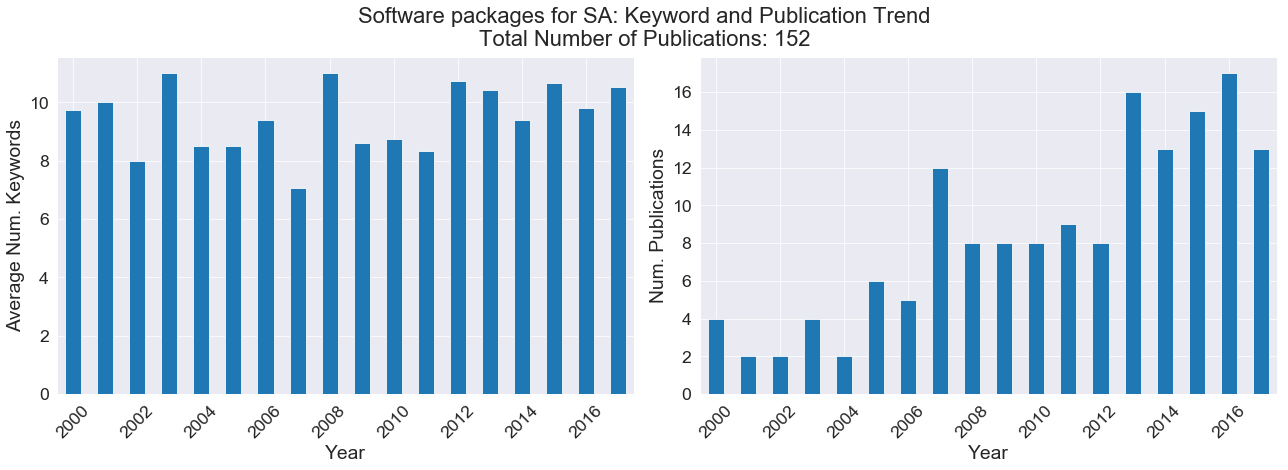

In [29]:
wos_plot.plot_kw_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', save_plot_fn='figs/sa_pub_trend.png')

In [23]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [26]:
all_optimization = optimization.combine_recs()

In [37]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Parallel computing techniques for sensitivity analysis in optimum structural design',
 'Reliability-based multiobjective optimization for automotive crashworthiness and occupant safety',
 'Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Topology optimization of material-nonlinear continuum structures by the element connectivity parameterization',
 'Application of non-linear automatic optimization techniques for calibration of HSPF',
 'Parameter estimation and uncertainty analysis for a watershed model']

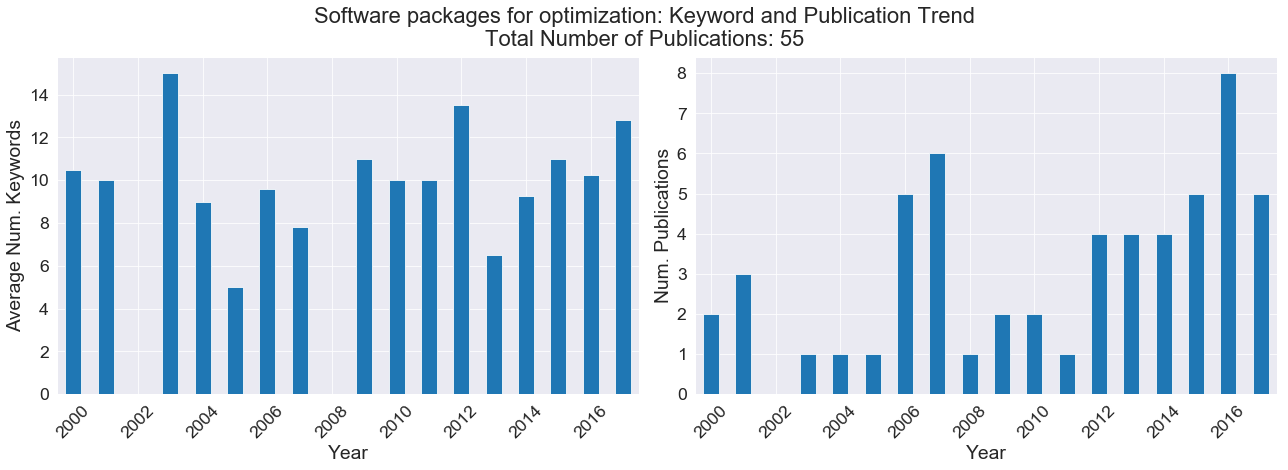

In [30]:
wos_plot.plot_kw_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', save_plot_fn='figs/opti_pub_trend.png')

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [105]:
ua_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_ua))

In [106]:
ua_phrases.display_phrases()

On ISSM and leveraging the Cloud towards faster quantification of the uncertainty in ice-sheet mass balance projections (2016) 
https://dx.doi.org/10.1016/j.cageo.2016.08.007 

We show how errors in the projections were accurately quantified using Monte-Carlo sampling analysis on the EC Cloud, and how a judicious mix of high-end parallel computing and Cloud use can best leverage existing infrastructures, and significantly accelerate delivery of potentially ground-breaking climate projections, and in particular, enable uncertainty quantification that were previously impossible to achieve. 

We demonstrate how this approach was used to carry out an extensive analysis of ice-flow projections on one of the largest basins in Greenland, the North-East Greenland Glacier, using the Ice Sheet System Model, the public-domain NASA-funded ice-flow modeling software. 

Among specific applications of this new paradigm, we show here how uncertainty quantification in climate projections of polar ice s

The estimation of uncertainty on doses broadly falls into three categories. 

A computer code is being developed that performs all three types of uncertainty analysis using Monte Carlo simulation. 


The OECD software tool for screening chemicals for persistence and long-range transport potential (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.06.014 

We present the software implementation of The OECD P-OV & LRTP Screening Tool (The Tool) that is used to assess the environmental hazard of organic chemicals using metrics of overall persistence (P-OV) and long-range transport potential (LRTP). 

The Tool is designed to support decision making for chemical management and includes features that are recommended by the Organization for Economic Cooperation and Development (OECD) expert group on multimedia modeling. 

The effect of uncertainties in input properties describing chemicals can be assessed with a Monte Carol analysis. 

The software is evaluated and illustrated by comparing res

Purpose Ensuring the sufficient service level is essential for critical materials in industrial maintenance. 

The service levels were simulated within the error of margin of the key input variables by using StockOptim optimization software and real data from a Finnish steel mill. 

It is proposed that managers work to improve the preciseness of the data, while the sensitivity analysis against statistical uncertainty, and a correction mechanism if necessary, should be integrated into optimization models. 

Findings - Service-level sensitivity is item specific, but, for many items, statistical imprecision in the input data causes significant uncertainty in the service level. 


An environmental assessment system for environmental technologies (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.06.007 

First, the focus is put on material flow modelling, as each flow is characterised as a mix of material fractions with different properties and flow compositions are computed as a basis for 

number of iterations required to generate the probability distribution of parameters), it was found that SCEM-UA and AMALGAM produce results quicker than GLUE in terms of required number of simulations. 

The quantification of the uncertainty associated with the models is a must, although it is rarely practiced. 


A user's guide to the brave new world of designing simulation experiments (2005) 
https://dx.doi.org/10.1287/ijoc.1050.0136 

We conclude with a discussion of areas that merit more work to achieve the potential benefits-either via new research or incorporation into standard simulation or statistical packages. 

Furthermore, we provide a research agenda listing problems in the design of simulation experiments-as opposed to real-world experiments-that require more investigation. 

Our discussion emphasizes aspects that are typical for simulation, such as having many more factors than in real-world experiments, and the sequential nature of the data collection. 

Many simulation

MEDOR, a didactic tool to support interpretation of bioassay data after internal contamination by actinides (2007) 
https://dx.doi.org/10.1093/rpd/ncm288 

Its main purpose is to evaluate the pertinence of the application of different models. 

This paper describes its first version that is focused on inhalation exposure to actinide aerosols. 

The user can analyse different inhalation cases showing either that dose per unit intake cannot be applied if the aerosol contains a low number of particles or that an inhibition of the late pulmonary clearance by particle transport can occur which contributes to a - fold increase in effective dose as compared with application of default parameters. 


Advances in concrete arch dams shape optimization (2011) 
https://dx.doi.org/10.1016/j.apm.2011.01.020 

The proposed methods are applied successfully to an Iranian arch dam, and good results are achieved. 

This paper presents an efficient methodology to find the optimum shape of arch dams. 

In 

In discussing the features and details of the integration of many of the components involved, we show the reader the wide variety of solution components that are available and what is possible when they are combined within a simulation capability. 

This interface is coupled to powerful automatic differentiation utilities that are used to implement efficient nonlinear solvers and preconditioners, and also to enable sensitivity analysis and embedded uncertainty quantification capabilities as part of the forward solve. 

It is an implicit, unstructured grid finite element code that hosts a set of advanced features that are readily combined within a single analysis run. 


Pi 4U: A high performance computing framework for Bayesian uncertainty quantification of complex models (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.12.006 

The optimization tasks associated with the asymptotic approximations are treated via the Covariance Matrix Adaptation Evolution Strategy (CMA-ES). 

The framework

The model was calibrated for  different initial conditions of in-sewer deposits. 

The tested model estimates the accumulation, erosion and transport of pollutants on surfaces and in sewers using a hydrologic/hydrodynamic scheme. 

Calibration results showed a large variability in the model outputs in function of the initial conditions and demonstrated that the tested model predictive capacity is very low. 


Estimation of uncertainty sources in the projections of Lithuanian river runoff (2013) 
https://dx.doi.org/10.1007/s00477-012-0608-7 

The emission scenarios had much greater influence on the runoff projection than the global climate models. 

Particular attention is given to the reliability of hydrological modelling results. 

The hydrological model parameters had less impact on the reliability of the modelling results. 

The impact of model parameters on the runoff modelling results was estimated using a sensitivity analysis for the selected hydrological periods (spring flood, w

The software MICA was adopted, in which the prior information about the parameters is updated to generate the parameter posterior distribution. 

The likelihood function adopted in MICA assumes that the residuals between the measured and modelled values have a normal distribution. 

This study compares the results from three different scenarios: (i) when normality of the residuals was checked but if they were not normal then nothing was done (unverified); (ii) normality assumption was checked, verified (using data transformations) and a weighting strategy was used that gives more importance to high flows; and (iii) normality assumption was checked and verified, but no weights were applied. 


Sensitivity of algorithm parameters and objective function scaling in multi-objective optimisation of water distribution systems (2015) 
https://dx.doi.org/10.2166/hydro.2015.062 

The results demonstrate that NSGA-II is sensitive to different parameter settings, and unlike in the single-objective

Results showed that, in spite of computing overheads, parallel computation of socio-environmental models on the Grid is beneficial for model applications especially with large spatial and temporal scales. 

We conducted experimental simulations with multiple temporal and spatial scale hydrological models on the Grid infrastructure. 

Recent advancements in distributed computing such as Grid infrastructure have provided further opportunity to this effort. 

A three-step procedure was applied to take advantage of the Grid. 


Estimating storm discharge and water quality data uncertainty: A software tool for monitoring and modeling applications (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.12.006 

For storm loads, the uncertainty was typically least for discharge (+/- -%), greater for sediment (+/- -%) and dissolved N and P (+/- -%) loads, and greater yet for total N and P (+/- -%). 

Hydrologic and water quality data are too important for scientists to continue to ignore the inheren

These locations coincide with aquifer areas that are confined by low permeability Mercia Mudstone deposits. 

Results indicate that northeastern, eastern and central regions have the lowest potential PCE concentrations in abstraction groundwater and therefore are the best sites for locating new boreholes. 


Robust design in aerodynamics using third-order sensitivity analysis based on discrete adjoint. Application to quasi-1D flows (2012) 
https://dx.doi.org/10.1002/fld.2604 

Because the objective function for the robust design problem comprises first-order and second-order sensitivity derivatives with respect to the environmental parameters, the application of a gradient-based method , which requires the sensitivities of this function with respect to the design variables, calls for the computation of third-order mixed derivatives. 

This is presented for the first time in the relevant literature and is the most efficient among other possible schemes on condition that the design varia

For the modeling we used RAMAS Landscape, a software package that integrates RAMAS GIS, population-modeling software, and LANDIS, forest-dynamics modeling software. 

We predicted the response of The Brown Creeper metapopulation over a -year period and used future population size and expected minimum population size to compare the sustainability of the various management scenarios. 


Sensitivity Analysis for Bayesian Hierarchical Models (2015) 
https://dx.doi.org/10.1214/14-BA909 

We propose a novel formal approach to prior sensitivity analysis, which is fast and accurate. 

Other formal approaches to prior sensitivity analysis suffer from a lack of popularity in practice, mainly due to their high computational cost and absence of software implementation. 

Despite its importance, informal approaches to prior sensitivity analysis are currently used. 

This is especially true for Bayesian hierarchical models, where interpretability of the parameters within deeper layers in the hierarc

This life cycle assessment evaluates and quantifies the environmental impacts of the production of hydrogen and transportation fuels from the fast pyrolysis and upgrading of corn stover. 

software is employed to estimate the environmental impacts. 

kg CO()eq and . 


Shale gas flowback water desalination: Single vs multiple-effect evaporation with vapor recompression cycle and thermal integration (2017) 
https://dx.doi.org/10.1016/j.desal.2016.11.003 

(C)  The Authors. 

The results highlight the potential of the proposed model to cost-effectively optimize SEE/MEE systems by producing fresh water and reducing brine discharges and associated environmental impacts. 

Multistage equipment with intercooling is used to compress the vapor formed by flashing and evaporation. 

A superstructure is proposed to solve the problem, comprising several evaporation effects coupled with intermediate flashing tanks that are used to enhance thermal integration by recovering condensate vapor. 

The ma

In an empirical example assessing longitudinal invariance of a harsh parenting construct, we employ PM-LFMs to assess sensitivity of results to assumptions about nonignorable missingness. 

Additionally, we contrast PM-LFMs to a latent mixture approach for accommodating nonignorable dropoutwherein missingness patterns can differ across latent groups. 


Automatic concept model generation for optimisation and robust design of passenger cars (2007) 
https://dx.doi.org/10.1016/j.advengsoft.2006.08.031 

The viability of the method is demonstrated for a vehicle component model of a front bumper system utilizing both material and geometry related properties as design variables. 

A fully automated method of structural optimisation for the body in white structure is presented. 

The optimisation was conducted using Genetic Algorithms (GA), which are ideally suited to solve problems with solution spaces that are too large to be exhaustively searched. 


PERSiST: a flexible rainfall-runoff mod

Identifiability of sorption parameters in stirred flow-through reactor experiments and their identification with a Bayesian approach (2016) 
https://dx.doi.org/10.1016/j.jenvrad.2016.06.008 

Parameter identifiability was studied.formally on the equations governing outlet concentrations. 

It was also studied numerically on  simulated CSTR experiments on a soil with known equilibrium-kinetic sorption parameters. 

This paper addresses the methodological conditions particularly experimental design and statistical inference ensuring the identifiability of sorption parameters from breakthrough curves measured during stirred flow-through reactor experiments also known as continuous flow stirred-tank reactor (CSTR) experiments. 

EK sorption parameters can not be identified from a single breakthrough curve of a CSTR experiment, because K-d,K- and k(-) were diagnosed collinear. 

For pairs of CSTR experiments, Bayesian inference allowed to select the correct models of sorption and error amon


Sensitivity Analysis of Multiple Informant Models When Data Are Not Missing at Random (2013) 
https://dx.doi.org/10.1080/10705511.2013.769393 

Statistical inference is based on the assumption that data are missing completely at random or missing at random. 

Importantly, whether or not data are missing is assumed to be independent of the missing data. 

Missing data are common in studies that rely on multiple informant data to evaluate relationships among variables for distinguishable individuals clustered within groups. 

Estimation of structural equation models using raw data allows for incomplete data, and so all groups can be retained for analysis even if only  member of a group contributes data. 


GUI-HDMR - A software tool for global sensitivity analysis of complex models (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.12.002 

The size of the set of samples is however dependent on the problem and can be successively increased if additional accuracy is required. 

The develo

In mDSS integrated assessment modelling provides the values of quantitative indicators to be used for transparent and participated decisions, through the application of value functions, weights and decision rules chosen by the end user. 

The policy background refers to the EU Water Framework Directive. 


Determination of the optimal installation capacity of small hydro-power plants through the use of technical, economic and reliability indices (2005) 
https://dx.doi.org/10.1016/j.enpol.2004.03.007 

This program analyzes and estimates the most important economic indices of an SHPP using the sensitivity analysis method. 

In this paper, a method to calculate the annual energy is presented, as is the program developed using Excel software. 


COOPT - a software package for optimal control of large-scale differential-algebraic equation systems (2001) 
https://dx.doi.org/10.1016/S0378-4754(01)00289-0 

Continuity constraints are imposed across the subintervals, The resulting optimization

In [107]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [108]:
sa_phrases.display_phrases()

On ISSM and leveraging the Cloud towards faster quantification of the uncertainty in ice-sheet mass balance projections (2016) 
https://dx.doi.org/10.1016/j.cageo.2016.08.007 

We show how errors in the projections were accurately quantified using Monte-Carlo sampling analysis on the EC Cloud, and how a judicious mix of high-end parallel computing and Cloud use can best leverage existing infrastructures, and significantly accelerate delivery of potentially ground-breaking climate projections, and in particular, enable uncertainty quantification that were previously impossible to achieve. 

We demonstrate how this approach was used to carry out an extensive analysis of ice-flow projections on one of the largest basins in Greenland, the North-East Greenland Glacier, using the Ice Sheet System Model, the public-domain NASA-funded ice-flow modeling software. 

Among specific applications of this new paradigm, we show here how uncertainty quantification in climate projections of polar ice s

The estimation of uncertainty on doses broadly falls into three categories. 

A computer code is being developed that performs all three types of uncertainty analysis using Monte Carlo simulation. 


Operational snow mapping with simplified data assimilation using the seNorge snow model (2016) 
https://dx.doi.org/10.1016/j.jhydrol.2016.03.061 

In this paper the revised seNorge snow model (v...) for snow mapping is described, and a simplified data assimilation procedure is introduced to correct detected snow model biases in near real-time. 

The model and analysis codes as well as the "R" statistical software are freely available. 

Numerical snow models are often applied in snow map production for operational hydrological services. 

The data assimilation procedure is theoretically based on the Bayesian updating paradigm and is meant to be pragmatic with modest computational and input data requirements. 

Frequently updated maps of snow conditions are useful for many applications, e.g

Integration of topology and shape optimization for design of structural components (2001) 
https://dx.doi.org/10.1007/PL00013282 

The B-spline curves and surfaces are then imported into a parametric CAD environment to build solid models of the structure. 

The integration is carried out by first converting the geometry of the topologically optimized structure into smooth and parametric B-spline curves and surfaces. 

In addition, commercial Computer-Aided Design (CAD), finite element analysis (FEA), optimization, and application software tools are incorporated to support the integrated optimization process. 

The control point movements of the B-spline curves or surfaces are defined as design variables for shape optimization, in which CAD-based design velocity field computations, design sensitivity analysis (DSA), and nonlinear programming are performed. 


Comparison of different uncertainty techniques in urban stormwater quantity and quality modelling (2012) 
https://dx.doi.org/10.1

It was found that even if the pollutant load reduced to % of the present level, the Cl- concentration in groundwater, even after  years, would not be reduced to the permissible limit of drinking water in the tannery belt. 

software to investigate the chloride migration in an area of . 

Total dissolved solids and chloride (Cl-) measurements in open wells in the tannery cluster vary from , to , and , to , mg/l, respectively. 

Input to the chloride migration model was a groundwater flow model that considered steady and transient conditions. 


Identification of Critical Erosion Watersheds for Control Management in Data Scarce Condition Using the SWAT Model (2015) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0001093 

Out of these  watersheds, erosion classes of  exactly matched with the manually described erosion class. 

Identification of critical watersheds prone to soil erosion has been performed by using a hydrological model in data scarce Damodar River catchment, located in Jhar

An illustration is given in this paper describing the developments around the Soil and Water Assessment Tool (SWAT) to support the implementation of the EU water Framework Directive. 

Research and development in hydroinformatics can play an important role in environmental impact assessment by integrating physically-based models, data-driven models and other information and Communication Tools (ICT). 

SWAT operates on the river basin scale and includes processes for the assessment of complex diffuse pollution; it is open-source software, which allows for site-specific modifications to the source and easy linkage to other hydroinformatics tools. 


Soil solution concentrations and chemical species of copper and zinc in a soil with a history of pig slurry application and plant cultivation (2016) 
https://dx.doi.org/10.1016/j.agee.2015.09.040 

The aim of this study was to assess the soluble, available,,and total Cu and Zn concentrations and the distribution of their chemical species in 

A total of , participants over the age of  years were included. 


Analyzing the effects of geological and parameter uncertainty on prediction of groundwater head and travel time (2013) 
https://dx.doi.org/10.5194/hess-17-3245-2013 

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each of them were estimated by calibration against observations of hydraulic head and stream discharge. 

In the third scenario each geological model was run with  randomized sets of parameters. 

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncertainty related to the embedded hydraulic parameters. 

Recent developments in theoretical methods for quantifying g

From our initial experiments, we found that the sensitivity analysis results were not sufficiently good and the interactions between parameters were not identified. 

This paper presents a technique for the critical parameter analysis of the disk drive manufacturing process. 


Comparison of sediment transport computations using hydrodynamic versus hydrologic models in the Simiyu River in Tanzania (2013) 
https://dx.doi.org/10.1016/j.pce.2013.02.003 

The SWAT model predicted an erosion rate of . 

Routing in SWAT is completed using the simplified Bagnold's equation and in the SOBEK-RE model is undertaken using the Saint Venant equation. 

The upstream boundary conditions for the routing modules were derived from the subcatchments sediment yields that were estimated by SWAT using the Modified Universal Soil Loss Equation (MUSLE). 

When comparing the results of the models for the different reaches of the main channel and main tributaries, the models showed different results both in mag

This optimisation model is applied to a regional non-drinking water distribution system, and solved using the optimisation software GANetXL incorporating the NSGA-II linked with the network analysis software EPANet. 


Effect of fracture zone on DNAPL transport and dispersion: a numerical approach (2010) 
https://dx.doi.org/10.1007/s12665-010-0468-8 

DNAPL movement in the subsurface showed a high sensitivity to fracture dip variation. 

Two numerical simulation techniques have been used to identify a suitable method to assist in the characterization of DNAPL movement within fractured porous rock aquifers. 

Both MODFLOW and UTCHEM software modeling suites were used to simulate different scenarios in fracture dip and hydraulic conductivities. 

Sensitivity analysis was conducted on both the hydraulic conductivity and fracture dip values. 


An SMT Based Method for Optimizing Arithmetic Computations in Embedded Software Code (2014) 
https://dx.doi.org/10.1109/TCAD.2014.2341931 

We have

With these benefits in mind, the Data Uncertainty Estimation Tool for Hydrology and Water Quality (DUET-H/WQ) was developed from an existing uncertainty estimation framework for small watershed discharge, sediment, and N and P data. 

When these uncertainty estimates for individual values were aggregated within study periods (i.e. 

DUET-H/WQ lists published uncertainty information for data collection procedures to assist the user in assigning appropriate data-specific uncertainty estimates and then calculates the uncertainty for individual discharge, concentration, and load values. 


SGEMS-UQ: An uncertainty quantification toolkit for SGEMS (2014) 
https://dx.doi.org/10.1016/j.cageo.2013.09.009 

A versatile XML-derived dialect is defined for communicating with external programs that reduces the need for ad-hoc linking of codes, and a relational database system is implemented to automate many of the steps in data mining the spatial and forward model parameters. 

Through a graphical 

In the proposed environment, Pro/ENGINEER and SolidWorks are supported for product model representation, DADS (Dynamic Analysis and Design System) is employed for dynamic simulation of mechanical systems including ground vehicles, and DOT (Design Optimization Tool) is included for a batch mode design optimization. 

In order to demonstrate the feasibility of such an environment, design parameterization that supports capturing design intents in product solid models must be available, and advanced modeling, simulation, and optimization technologies implemented in engineering software tools must be incorporated. 


A Life Cycle Comparison of Alternative Cheese Packages (2009) 
https://dx.doi.org/10.1002/clen.200700185 

SimaPro software (PReConsultants, The Netherlands) was used for the LCA study. 

A package for  kg of cheese was selected as the functional unit. 

The EcoIndicator  method was selected for comparison of the packages. 


A toolbox using the stochastic optimization algorith

Its main features include: (i) a high-fidelity dynamic model representation, also involving global sensitivity analysis, parameter estimation and mixed integer dynamic optimization capabilities; (ii) a suite/toolbox of model approximation methods; (iii) a host of multi-parametric programming solvers for mixed continuous/integer problems; (iv) a state-space modeling representation capability for scheduling and control problems; and (v) an advanced toolkit for multi-parametric/explicit Model Predictive Control and moving horizon reactive scheduling problems. 

While significant progress has been achieved over the years, it is fair to say that at the moment there is not a generally accepted methodology and/or "protocol" for such an integration - it is also interesting to note that currently, there is not a commercially available software [or even in a prototype form] system to fully support such an activity. 


The Data Uncertainty Engine (DUE): A software tool for assessing and simulatin

A superstructure is proposed to solve the problem, comprising several evaporation effects coupled with intermediate flashing tanks that are used to enhance thermal integration by recovering condensate vapor. 

The mathematical model is formulated as a nonlinear programming (NLP) problem optimized under GAMS software by minimizing the total annualized cost. 


Sensitivity analyses and simulations of a full-scale experimental membrane bioreactor system using the activated sludge model No. 3 (ASM3) (2015) 
https://dx.doi.org/10.1080/10934529.2015.981122 

Other parameters related to the hydrolysis process or to the autotrophic biomass also significantly influenced model outputs. 

An ASM-based model was implemented in the numerical software MATHEMATICA where sensitivity analyses and simulations of a membrane bioreactor (MBR) system were carried out. 

Similar results were in general obtained in both cases and according to these analyses, the most significant inputs over the model predicti

Water shortage and groundwater pollution have become two primary environmental concerns to Beijing since the s. The local aquifers, as the dominant sources for domestic and agricultural water supply, are depleting due to groundwater abstraction and continuous drought in recent years with rapid urbanization and increasing water consumption. 

The results of the calibrated model show reasonable agreements with observed water levels. 

The transient groundwater flow simulations reflect the observed drawdown of the last  years and show the formation of a depression cone in an intensively pumped area. 


A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful to obtain new parameters that relate the sensitivity of the equations to the variations that are produced by the experimental data. 

On the other hand, they disc

EK sorption parameters can not be identified from a single breakthrough curve of a CSTR experiment, because K-d,K- and k(-) were diagnosed collinear. 

For pairs of CSTR experiments, Bayesian inference allowed to select the correct models of sorption and error among sorption alternatives. 


Parameter sensitivity analysis and optimization of Noah land surface model with field measurements from Huaihe River Basin, China (2015) 
https://dx.doi.org/10.1007/s00477-015-1033-5 

This study aims to identify the parameters that are most important in controlling the Noah land surface model (LSM), the analysis of parameter interactions, and the evaluation of the performance of parameter optimization using the parameter estimation software PEST. 

To our knowledge, this parameter interaction in the Noah LSM has never been studied before. 

According to the sensitivity analysis results, four sensitive parameters were chosen to be optimized using the PEST method. 

Three sensitivity analysis method

This new optimal flow control model can be generally applied to make optimal decisions in real-time flood control and water resource management in a watershed. 

The internal boundary conditions of the adjoint equations at a confluence (junction) derived by the variational approach make the flow control model applicable to solve optimal flow control problems in a channel network over a watershed. 


Enhancing the Characterization of Epistemic Uncertainties in PM2.5 Risk Analyses (2015) 
https://dx.doi.org/10.1111/risa.12236 

risk estimates to several key forms of epistemic uncertainty that pervade those calculations: the risk coefficient, shape of the risk function, and the relative toxicity of individual PM. 

This article discusses the purpose and appropriate role of a risk analysis tool to support risk management deliberations, and evaluates the functions of BenMAP in this context. 

We conclude that BenMAP would more usefully fulfill its role as a risk analysis support tool if its

The only requirement is to access the field solution at the perturbation grid points. 

We show that our sensitivity analysis approach yields Jacobians of second-order accuracy for lossy dielectric structures. 

Our approach yields the responses and their derivatives with only one system analysis regardless of the number of optimizable parameters. 


An automated decision support system for aided assessment of variogram models (2017) 
https://dx.doi.org/10.1016/j.envsoft.2016.11.004 

In the present paper, an extensive cross-validation procedure, based on the analysis of numerical indices and graphical tools, is described and discussed. 

Besides classical accuracy indices, two new integrated tools based on the variogram of residuals are introduced, which take the spatial nature of the dataset into account. 


Estimating Water Budgets and Vertical Leakages for Karst Lakes in North-Central Florida (United States) Via Hydrological Modeling (2011) 
https://dx.doi.org/10.1111/j.1752-1688.2

In [110]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [111]:
opt_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


A software development framework for structural optimization considering non linear static responses (2015) 
https://dx.doi.org/10.1007/s00158-015-1228-x 

Various analysis and optimization systems are in

Parameterization based shape optimization: theory and practical implementation aspects (2005) 
https://dx.doi.org/10.1108/02644400510603041 

Findings - The proposed approach offers an unified approach to shape optimization of skeletal, as well as continuous structures. 

The design element is used to retrieve the nodal geometrical data of finite elements (FEs). 

Purpose - To present an approach to parameterization based shape optimization of statically loaded structures and to propose its practical implementation. 

Originality/value - The paper offers a rather simple, but quite powerful approach to structural shape optimization together with practical hints for its computational implementation. 

For practical implementation it is proposed to establish the optimization cycle by two separately running processes. 


The rocky road to extended simulation frameworks covering uncertainty, inversion, optimization and control (2017) 
https://dx.doi.org/10.1016/j.envsoft.2016.10.003 

While

As an alternative to the element density formulation, the element connectivity parameterization (ECP) formulation is developed for the topology optimization of isotropic-hardening elastoplastic or hyperelastic continua by using commercial software. 

Furthermore, it is very difficult to use analytic sensitivity when a commercial nonlinear finite element code is used. 

ECP varies the stiffness of zero-length linear elastic links that connect design domain-discretizing finite elements. 


Development of a Long-term, Ecologically Oriented Dam Release Plan for the Lake Baiyangdian Sub-basin, Northern China (2013) 
https://dx.doi.org/10.1007/s11269-012-0198-7 

The results of the optimization analysis provide a set of effective compromises among the target objectives that can guide future management of water releases from the reservoir. 

To determine the limitations of the method, we performed a sensitivity analysis, and discuss the optimal results for different weightings of objectives p

The control point movements of the B-spline curves or surfaces are defined as design variables for shape optimization, in which CAD-based design velocity field computations, design sensitivity analysis (DSA), and nonlinear programming are performed. 


A topological optimization approach for structural design of a high-speed low-load mechanism using the equivalent static loads method (2012) 
https://dx.doi.org/10.1002/nme.3253 

In order to show the efficiency of the presented method, we presented two numerical cases. 

In high-speed low-load mechanisms, the principal loads are the inertial forces caused by the high accelerations and velocities. 

In this paper, a topological optimization method is presented on the basis of the equivalent static loads method. 

Kinetic DOFs are used to simulate the motion joints, and a quasi-static analysis is performed to obtain the structural responses. 

Finally, the topological optimization approach is presented on the basis of the evolutionary str

The objective of the paper is to present methods and software for the efficient statistical, sensitivity and reliability assessment of engineering problems. 


A GUI platform for uncertainty quantification of complex dynamical models (2016) 
https://dx.doi.org/10.1016/j.envsoft.2015.11.004 

We illustrate the different functions of UQ-PyL by applying it to the uncertainty analysis of the Sacramento Soil Moisture Accounting Model. 

(C)  The Authors. 

It is written in Python language and runs on all common operating systems. 

Uncertainty quantification (UQ) refers to quantitative characterization and reduction of uncertainties present in computer model simulations. 

We will also demonstrate that UQ-PyL can be applied to a wide range of applications. 


An evolutionary optimization of diffuser shapes based on CFD simulations (2010) 
https://dx.doi.org/10.1002/fld.2124 

The indigenously developed algorithm uses the CFD software: Fluent for the hydrodynamic analysis and employs a genet

COOPT - a software package for optimal control of large-scale differential-algebraic equation systems (2001) 
https://dx.doi.org/10.1016/S0378-4754(01)00289-0 

Continuity constraints are imposed across the subintervals, The resulting optimization problem is solved by sparse sequential quadratic programming (SQP) methods. 

Partial derivative matrices needed for the optimization are generated by DAE sensitivity software. 

The sensitivity equations to be solved are generated via automatic differentiation. 

The basic approach in COOPT is to divide the original time interval into multiple shooting intervals, with the DAEs solved numerically on the subintervals at each optimization iteration. 


Software framework for parameter updating and finite-element response sensitivity analysis (2008) 
https://dx.doi.org/10.1061/(ASCE)0887-3801(2008)22:5(281) 

All messages to identify and update parameters are passed through a Facade that decouples client applications from the finite-element doma

<hr> Top-cited journals for UA/SA/optimization

In [113]:
all_ua2 = all_ua

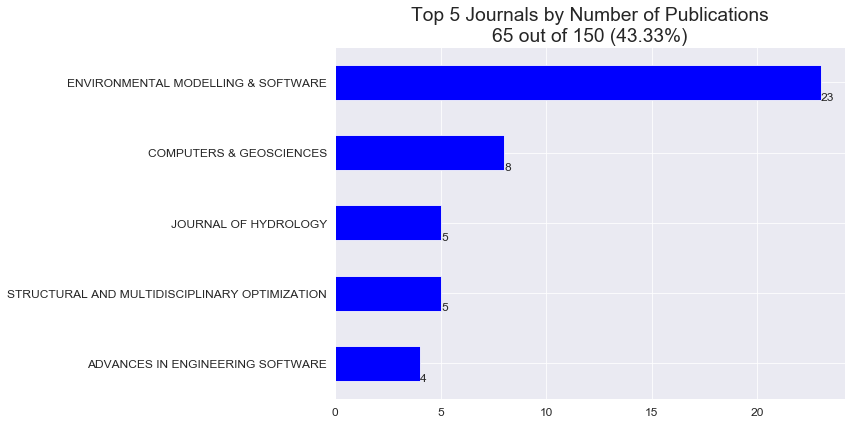

In [115]:
wos_plot.plot_pubs_per_journal(all_ua2, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/ua2_journal_pubs.png')

In [117]:
journals_of_interest_ua2 = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Computers & Geosciences'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Advances in Engineering Software'.upper()]
pubs_for_journals_ua2 = wosis.find_pubs_by_journal(all_ua2, journals_of_interest_ua2)

In [118]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_ua2 = {}
for pubs in pubs_for_journals_ua2:
    paper_citations_per_journal_ua2[pubs] = wosis.get_num_citations(pubs_for_journals_ua2[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5BJSOkn9Psc698aRAdq)



Authenticated (SID: 7DN11OUadxWqUkWgYYH)


In [119]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_ua2 = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_ua2.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_ua2 = collection_ua2.append(df[cols_of_interest][0:10], ignore_index=True)

In [120]:
top_cited_in_top_journals_ua2 = collection_ua2.sort_values('citations', ascending=False)
top_cited_in_top_journals_ua2.head(10)

,AU,year,title,journal,citations,DOI link
8,"Bennett, ND|Croke, BFW|Guariso, G|Guillaume, J...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,581,https://dx.doi.org/10.1016/j.envsoft.2012.09.011
9,"Campolongo, F|Cariboni, J|Saltelli, A",2007,An effective screening design for sensitivity ...,ENVIRONMENTAL MODELLING & SOFTWARE,578,https://dx.doi.org/10.1016/j.envsoft.2006.10.004
18,"Abbaspour, KC|Yang, J|Maximov, I|Siber, R|Bogn...",2007,Modelling hydrology and water quality in the p...,JOURNAL OF HYDROLOGY,560,https://dx.doi.org/10.1016/j.jhydrol.2006.09.014
19,"van Griensven, A|Meixner, T|Grunwald, S|Bishop...",2006,A global sensitivity analysis tool for the par...,JOURNAL OF HYDROLOGY,555,https://dx.doi.org/10.1016/j.jhydrol.2005.09.008
10,"Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,510,https://dx.doi.org/10.1016/j.envsoft.2007.02.004
11,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,ENVIRONMENTAL MODELLING & SOFTWARE,407,https://dx.doi.org/10.1016/S1364-8152(03)00078-1
28,"Sigmund, O|Maute, K",2013,Topology optimization approaches A comparative...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,382,https://dx.doi.org/10.1007/s00158-013-0978-6
12,"Saltelli, A|Annoni, P",2010,How to avoid a perfunctory sensitivity analysis,ENVIRONMENTAL MODELLING & SOFTWARE,355,https://dx.doi.org/10.1016/j.envsoft.2010.04.012
20,"Oudin, L|Hervieu, F|Michel, C|Perrin, C|Andrea...",2005,Which potential evapotranspiration input for a...,JOURNAL OF HYDROLOGY,321,https://dx.doi.org/10.1016/j.jhydrol.2004.08.026
21,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,JOURNAL OF HYDROLOGY,312,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012


In [121]:
all_sa2 = all_sa

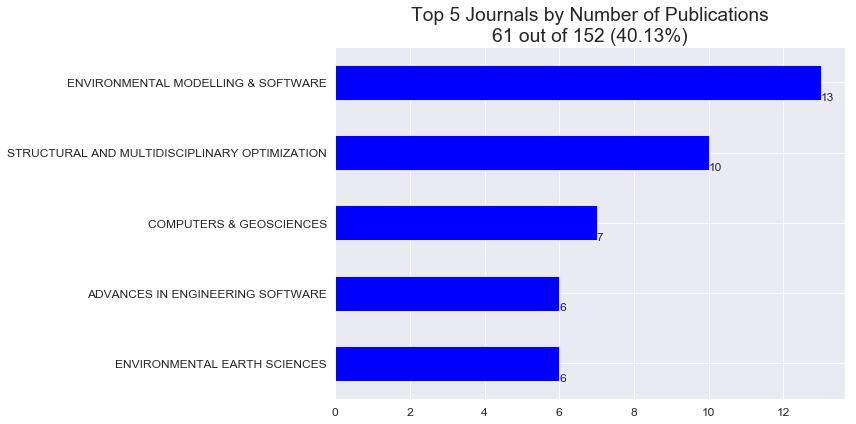

In [122]:
wos_plot.plot_pubs_per_journal(all_sa2, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/sa2_journal_pubs.png')

In [123]:
journals_of_interest_sa2 = ['Environmental Modelling & Software'.upper(), 'Environmental Earth Sciences'.upper(), 'Computers & Geosciences'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Advances in Engineering Software'.upper()]
pubs_for_journals_sa2 = wosis.find_pubs_by_journal(all_sa2, journals_of_interest_sa2)

In [124]:
data_dir = "tmp"  # Using the temporary data directory 
                    #- should this be a different tmp?

# Get citations for each paper
paper_citations_per_journal_sa2 = {}
for pubs in pubs_for_journals_sa2:
    paper_citations_per_journal_sa2[pubs] = wosis.get_num_citations(pubs_for_journals_sa2[pubs], wos_config, 
                                                                    cache_dir=data_dir)

Authenticated (SID: 5FEL2NdjBSwoW9aNrkZ)


In [125]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_sa2 = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_sa2.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_sa2 = collection_sa2.append(df[cols_of_interest][0:10], ignore_index=True)

In [126]:
top_cited_in_top_journals_sa2 = collection_sa2.sort_values('citations', ascending=False)
top_cited_in_top_journals_sa2.head(10)

,AU,year,title,journal,citations,DOI link
8,"Bennett, ND|Croke, BFW|Guariso, G|Guillaume, J...",2013,Characterising performance of environmental mo...,ENVIRONMENTAL MODELLING & SOFTWARE,581,https://dx.doi.org/10.1016/j.envsoft.2012.09.011
9,"Campolongo, F|Cariboni, J|Saltelli, A",2007,An effective screening design for sensitivity ...,ENVIRONMENTAL MODELLING & SOFTWARE,578,https://dx.doi.org/10.1016/j.envsoft.2006.10.004
10,"Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...",2007,Uncertainty in the environmental modelling pro...,ENVIRONMENTAL MODELLING & SOFTWARE,510,https://dx.doi.org/10.1016/j.envsoft.2007.02.004
11,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,ENVIRONMENTAL MODELLING & SOFTWARE,407,https://dx.doi.org/10.1016/S1364-8152(03)00078-1
18,"Sigmund, O|Maute, K",2013,Topology optimization approaches A comparative...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,382,https://dx.doi.org/10.1007/s00158-013-0978-6
12,"Saltelli, A|Annoni, P",2010,How to avoid a perfunctory sensitivity analysis,ENVIRONMENTAL MODELLING & SOFTWARE,355,https://dx.doi.org/10.1016/j.envsoft.2010.04.012
13,"Jakeman, AJ|Letcher, RA",2003,"Integrated assessment and modelling: features,...",ENVIRONMENTAL MODELLING & SOFTWARE,233,https://dx.doi.org/10.1016/S1364-8152(03)00024-0
19,"van Dijk, NP|Maute, K|Langelaar, M|van Keulen, F",2013,Level-set methods for structural topology opti...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,199,https://dx.doi.org/10.1007/s00158-013-0912-y
14,"Pollino, CA|Woodberry, O|Nicholson, A|Korb, K|...",2007,Parameterisation and evaluation of a Bayesian ...,ENVIRONMENTAL MODELLING & SOFTWARE,194,https://dx.doi.org/10.1016/j.envsoft.2006.03.006
20,"Shan, SQ|Wang, GG",2010,Survey of modeling and optimization strategies...,STRUCTURAL AND MULTIDISCIPLINARY OPTIMIZATION,192,https://dx.doi.org/10.1007/s00158-009-0420-2


<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [39]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

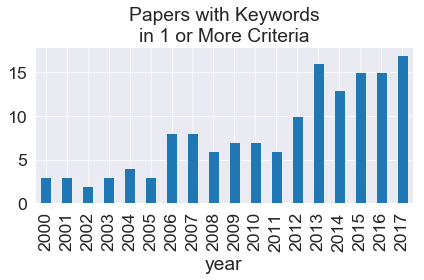

In [41]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [42]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [43]:
all_policy = policy.combine_recs()

In [44]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [45]:
policy_phrases.display_phrases()

Investigating uncertainty and sensitivity in integrated, multimedia environmental models: tools for FRAMES-3MRA (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.013 

seconds/simulation, a relative cost increase of .% over average model runtime. 

The MRA modeling system includes a set of  science modules that collectively simulate release, fate and transport, exposure, and risk associated with hazardous contaminants disposed of in land-based waste management units (WMU). 

Developed for MRA and extendable to other computer models, an accompanying platform-independent, Java-based parallel processing software toolset is also discussed. 

For MRA, comparison of stand-alone PC versus SuperMUSE simulation executions showed a parallel computing overhead of only . 

The Framework for Risk Analysis in Multimedia Environmental Systems - Multimedia, Multipathway, and Multireceptor Risk Assessment (FRAMES-MRA) is an important software model being developed by the United States Environmental 

In discussing the features and details of the integration of many of the components involved, we show the reader the wide variety of solution components that are available and what is possible when they are combined within a simulation capability. 

This interface is coupled to powerful automatic differentiation utilities that are used to implement efficient nonlinear solvers and preconditioners, and also to enable sensitivity analysis and embedded uncertainty quantification capabilities as part of the forward solve. 

It is an implicit, unstructured grid finite element code that hosts a set of advanced features that are readily combined within a single analysis run. 


Estimating storm discharge and water quality data uncertainty: A software tool for monitoring and modeling applications (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.12.006 

For storm loads, the uncertainty was typically least for discharge (+/- -%), greater for sediment (+/- -%) and dissolved N and P (+/- -%) load

Parallel computing techniques for sensitivity analysis in optimum structural design (2007) 
https://dx.doi.org/10.1016/(ASCE)0887-3801(2007)21:6(463) 

single-level and multilevel parallelisms are pursued for design sensitivities. 

The parallel algorithms for design sensitivity analysis have been implemented on message passing parallel systems within the software platform of Parallel Computer Adaptive Language. 

Numerical studies show that the performance of the parallel algorithms for design sensitivities on message passing systems is very good. 


The rocky road to extended simulation frameworks covering uncertainty, inversion, optimization and control (2017) 
https://dx.doi.org/10.1016/j.envsoft.2016.10.003 

While there is an ongoing discussion on quality assurance and reproducibility for simulation frameworks, we have not observed a similar discussion for the extended case. 

Recently, the combination with tools for uncertainty quantification, inverse modelling, optimization and

The key logistical parameters are analysed to generate environmental and economic ranking tables. 


Utility of dynamic-landscape metapopulation models for sustainable forest management (2005) 
https://dx.doi.org/10.1111/j.1523-1739.2005.00276.x 

We wrote new software to bell) quantify the contribution of landscape stochasticity to model prediction uncertainty. 

We used the Brown Creeper (Certhia americana) in the boreal forests of northern Ontario as a case study. 

Primary concerns about the method are the practical difficulties associated with incorporating fire stochasticity in prediction uncertainty and the number of model assumptions that must be made and tested with sensitivity analysis. 

For the modeling we used RAMAS Landscape, a software package that integrates RAMAS GIS, population-modeling software, and LANDIS, forest-dynamics modeling software. 

We predicted the response of The Brown Creeper metapopulation over a -year period and used future population size and expecte

Water quality Risk Analysis Tool (WaterRAT) is software for supporting decision-making in surface water quality management. 

Using sensitivity and uncertainty analyses based on Monte Carlo simulation and first order methods, WaterRAT allows the modeller to identify the significant uncertainties, and evaluate the degree to which they control decision-making risk. 


Optimal control of open-channel flow using adjoint sensitivity analysis (2006) 
https://dx.doi.org/10.1061/(ASCE)0733-9429(2006)132:11(1215) 

This new optimal flow control model can be generally applied to make optimal decisions in real-time flood control and water resource management in a watershed. 

The internal boundary conditions of the adjoint equations at a confluence (junction) derived by the variational approach make the flow control model applicable to solve optimal flow control problems in a channel network over a watershed. 


Enhancing the Characterization of Epistemic Uncertainties in PM2.5 Risk Analyses (201

According to the results, the production of raw materials and the firing process in the magnesia spinel brick production were found to have several negative effects on the environment and were costly. 


Sensitivity of population viability to spatial and nonspatial parameters using grip (2008) 
https://dx.doi.org/10.1890/07-1306.1 

We evaluated GRIP's performance as a tool for sensitivity analysis of spatial PVAs and explored the consequences of varying spatial input parameters for predictions of a published PVA model of the sand lizard (Lacerta agilis). 

Sensitivity analyses of population viability analysis (PVA) models can help measure relative parameter influences on predictions, identify research priorities for reducing uncertainty, and evaluate management strategies. 

We provide annotated code so that GRIP may be modified to reflect particular species biology, customized for more complex spatial PVA models, upgraded to incorporate features added in newer versions of RAMAS Metap

In [46]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [47]:
all_agri = agri.combine_recs()

In [48]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [49]:
agri_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Integration of a Three-Dimensional Process-Based Hydrological Model into the Object Modeling System (2016) 
https://dx.doi.org/10.3390/w8010012 

The integration of a spatial process model into an environ

Water Works can also be used in regional development planning. 


Simiyu River catchment parameterization using SWAT model (2007) 
https://dx.doi.org/10.1016/j.pce.2007.07.053 

The low level of model performance achieved in these studies showed that other factors than the spatial land data are greatly important for improvement of flow estimation by SWAT in Simiyu. 

The analysis of sensitive parameters and auto-calibration was achieved by sensitivity analysis and auto-calibration options, which are new in the recent version of SWAT, SWAT . 

The land use data were reclassified based on some ground truth maps using IDRISI Kilimanjaro software. 

The river discharge estimates from this and a previous study were compared so as to evaluate performances of the recent hydrologic simulations in the catchment. 

The Soil data were also reclassified manually to represent different soil hydrologic groups, which are important for the SWAT model set-up and simulations. 




In [50]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [51]:
all_water = water.combine_recs()

In [52]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [53]:
water_phrases.display_phrases()

Designing and implementing a multi-core capable integrated urban drainage modelling Toolkit:Lessons from CityDrain3 (2016) 
https://dx.doi.org/10.1016/j.advengsoft.2016.08.004 

Integrated urban drainage modelling combines different aspects of the urban water system into a common framework. 

The performance advantage of parallelization (up to  times compared to its predecessor) and the scalability of the framework are also demonstrated. 

The design and implementation of the integrated modelling framework CityDrain shows that it is possible to write research code that is high-performance and extensible by many research projects. 

With advancements in modern information technology, a parallel implementation of such a modelling toolkit is mandatory while still leaving its users the flexibility of extensions. 

With increasing pressures of a changing climate, urban growth and economic constraints, the need for wider spread integration is necessary in the interest of a sustainable future

DUET-H/WQ lists published uncertainty information for data collection procedures to assist the user in assigning appropriate data-specific uncertainty estimates and then calculates the uncertainty for individual discharge, concentration, and load values. 


Groundwater drawdown at Nankou site of Beijing Plain: model development and calibration (2011) 
https://dx.doi.org/10.1007/s12665-011-0957-4 

Water shortage and groundwater pollution have become two primary environmental concerns to Beijing since the s. The local aquifers, as the dominant sources for domestic and agricultural water supply, are depleting due to groundwater abstraction and continuous drought in recent years with rapid urbanization and increasing water consumption. 

The results of the calibrated model show reasonable agreements with observed water levels. 

The transient groundwater flow simulations reflect the observed drawdown of the last  years and show the formation of a depression cone in an intensively pumped a

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncertainty related to the embedded hydraulic parameters. 

Recent developments in theoretical methods for quantifying geological uncertainty have made it possible to consider this factor in groundwater modeling. 


River-to-sea pressure retarded osmosis: Resource utilization in a full-scale facility (2016) 
https://dx.doi.org/10.1016/j.desal.2016.01.012 

Furthermore, a sensitivity analysis was performed to elucidate the relationship between net specific energy and power density as functions of membrane area, flow rates, and operating pressures. 

This source of renewable energy is sizeable and in the past decade several investigations analyzed its potential. 

In this article, the net specific energy production from a facility-scale PRO system was determined and optimized by using a novel simulation method that integrates parasitic loads and efficiencies of the PRO facility compo

The simulation and optimisation module in Water Works provides an opportunity to evaluate Infrastructure investment decisions to suit their seasonal or long-term water availability. 

It helps irrigators to improve the economic efficiency, water use efficiency and environmental performance of their farm businesses. 

Water Works can also be used in regional development planning. 


A toolbox using the stochastic optimization algorithm MIPT and ChemCAD for the systematic process retrofit of complex chemical processes (2016) 
https://dx.doi.org/10.1016/j.compchemeng.2015.08.023 

An optimization framework for the purpose of retrofitting using a rigorous process simulation tool is proposed to fulfill this task. 

The results of a sensitivity analysis and the optimization for different feed compositions are presented. 

The toolbox provides a quick evaluation of the process by searching for the global optimum. 

The usage of a rigorous process simulator is providing a high accuracy of the 

We developed interactive interfaces so that the optimization processes are transparent. 


An environmental and economic analysis for geotube coastal structures retaining dredge material (2012) 
https://dx.doi.org/10.1016/j.resconrec.2012.01.011 

() on the economic aspects of geotube technology and identifies the optimum method of construction for each type of coastal structure. 

In general, the larger the scale of the project the greater the potential savings in CO emissions and cost that can be achieved through the use of geotube technology. 

The analyses highlight that the size of the structure and the distance to the source of the quarry material are crucial factors in determining the optimum construction method. 

This paper investigates the environmental and economic sensitivity of coastal structures for two different construction methods: a traditional rubble mound structure and a geotube coastal structure using dredged material. 

The key logistical parameters are analysed t

https://dx.doi.org/10.1016/j.envsoft.2013.01.004 

This work presents and illustrates the application of hydroPSO, a novel multi-OS and model-independent R package used for model calibration. 

hydroPSO implements several state-of-the-art enhancements and fine-tuning options to the Particle Swarm Optimisation (PSO) algorithm to meet specific user needs. 

Although we limit the application of hydroPSO to hydrological models, flexibility of the package suggests it can be implemented in a wider range of models requiring some form of parameter optimisation. 

We further illustrate the application of hydroPSO in two real-world case studies: we calibrate, first, a hydrological model for the Ega River Basin (Spain) and, second, a groundwater flow model for the Pampa del Tamarugal Aquifer (Chile). 


Variance-based sensitivity analysis of the probability of hydrologically induced slope instability (2006) 
https://dx.doi.org/10.1016/j.cageo.2005.10.007 

The SIMLAB software was used, both to ge

Identification of Critical Erosion Watersheds for Control Management in Data Scarce Condition Using the SWAT Model (2015) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0001093 

Out of these  watersheds, erosion classes of  exactly matched with the manually described erosion class. 

Identification of critical watersheds prone to soil erosion has been performed by using a hydrological model in data scarce Damodar River catchment, located in Jharkhand state of India. 

and .-., for both the watersheds during calibration and validation period. 

Model was successfully used for prioritization of  watersheds delineated using the computer software model within the catchment. 

Calibration and validation results revealed that model is predicting monthly runoff and sediment yield satisfactory for the two watersheds of the Damodar River catchment. 


Multisite Assessment of Hydrologic Processes in Snow-Dominated Mountainous River Basins in Colorado Using a Watershed Model (2015) 
https://dx.d

https://dx.doi.org/10.1007/s12665-011-0908-0 

Mean permeability has the most effect on CO storage capacity and injectivity; k(v)/k(h) affects CO injectivity storage capacity more than permeability variation, V-k. More CO can be stored in the heterogeneous reservoirs with low mean permeability; however, high injectivity can be achieved in the uniform reservoirs with high mean permeability. 

This work studied the effect of completion techniques and reservoir heterogeneity on CO storage and injectivity in saline aquifers using a compositional reservoir simulator, CMG-GEM. 

The heterogeneity effect was addressed by considering three parameters: mean permeability, the vertical to horizontal permeability ratio, and permeability variation. 

Simulation results show that the most favorable option is the perforation of all layers with horizontal wells - m long set in the upper layers. 


Monte Carlo Approach for Uncertainty Analysis of Acoustic Doppler Current Profiler Discharge Measurement 

In [54]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [55]:
all_enviro = enviro.combine_recs()

In [56]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [57]:
enviro_phrases.display_phrases()

On ISSM and leveraging the Cloud towards faster quantification of the uncertainty in ice-sheet mass balance projections (2016) 
https://dx.doi.org/10.1016/j.cageo.2016.08.007 

We show how errors in the projections were accurately quantified using Monte-Carlo sampling analysis on the EC Cloud, and how a judicious mix of high-end parallel computing and Cloud use can best leverage existing infrastructures, and significantly accelerate delivery of potentially ground-breaking climate projections, and in particular, enable uncertainty quantification that were previously impossible to achieve. 

We demonstrate how this approach was used to carry out an extensive analysis of ice-flow projections on one of the largest basins in Greenland, the North-East Greenland Glacier, using the Ice Sheet System Model, the public-domain NASA-funded ice-flow modeling software. 

Among specific applications of this new paradigm, we show here how uncertainty quantification in climate projections of polar ice s

Environmental and ecological hydroinformatics to support the implementation of the European Water Framework Directive for river basin management (2006) 
https://dx.doi.org/10.2166/hydro.2006.010 

An illustration is given in this paper describing the developments around the Soil and Water Assessment Tool (SWAT) to support the implementation of the EU water Framework Directive. 

Research and development in hydroinformatics can play an important role in environmental impact assessment by integrating physically-based models, data-driven models and other information and Communication Tools (ICT). 

SWAT operates on the river basin scale and includes processes for the assessment of complex diffuse pollution; it is open-source software, which allows for site-specific modifications to the source and easy linkage to other hydroinformatics tools. 


Distributed computation of large scale SWAT models on the Grid (2013) 
https://dx.doi.org/10.1016/j.envsoft.2012.08.002 

Then, individual sub-mod

https://dx.doi.org/10.1016/j.scitotenv.2015.01.112 

The use group of lifecycle stages for the dispenser product system, which represents the cradle to gate lifecycle stages associated with the paper towels, constitutes the major portion of this impact. 

An uncertainty analysis addressing key input data and assumptions made, a sensitivity analysis covering the use intensity of the product systems and a scenario analysis looking at a US based use phase for the hand dryer were also conducted. 

It is evident from the results of this study that per dry, for a use phase supplied by Ontario's grid ( grid mix scenario) and a United States based manufacturing scenario, the use of a conventional hand dryer (rated at  W and under a  s use intensity) has a lesser environmental impact than with using two paper towels (% recycled content, unbleached and weighing  g) issued from a roll dispenser. 

The Impact + method was used for classification and characterization of these environmental impacts.

First, the focus is put on material flow modelling, as each flow is characterised as a mix of material fractions with different properties and flow compositions are computed as a basis for the LCA calculations. 

Finally, tools for uncertainty analysis are provided, enabling the user to parameterise systems fully and propagate probability distributions through Monte Carlo analysis. 

A new model for the environmental assessment of environmental technologies, EASETECH, has been developed. 


Design parameterization and tool integration for CAD-based mechanism optimization (2006) 
https://dx.doi.org/10.1016/j.advengsoft.2006.05.005 

This paper presents an open and integrated tool environment that enables engineers to effectively search, in a CAD solid model form, for a mechanism design with optimal kinematic and dynamic performance. 

In this paper, the design parameterization capabilities developed previously have been applied to support design optimization of engineering products, inc

This paper investigates the environmental and economic sensitivity of coastal structures for two different construction methods: a traditional rubble mound structure and a geotube coastal structure using dredged material. 

The key logistical parameters are analysed to generate environmental and economic ranking tables. 


Parameter sensitivity analysis and optimization of Noah land surface model with field measurements from Huaihe River Basin, China (2015) 
https://dx.doi.org/10.1007/s00477-015-1033-5 

This study aims to identify the parameters that are most important in controlling the Noah land surface model (LSM), the analysis of parameter interactions, and the evaluation of the performance of parameter optimization using the parameter estimation software PEST. 

To our knowledge, this parameter interaction in the Noah LSM has never been studied before. 

According to the sensitivity analysis results, four sensitive parameters were chosen to be optimized using the PEST method. 

T

As well as this, they can provide the modeler with valuable qualitative information on the shape of parameter and predictive probability distributions; these shapes can be quite complex, especially where local objective function optima lie within those parts of parameter space that are considered probable after calibration has been undertaken. 

Where numerical models are employed as an aid to environmental management, the uncertainty associated with predictions made by such models must be assessed. 

Hence similar studies, or extensions of the present study, can be easily undertaken in other modeling contexts by other modelers. 

Nonlinear calibration-constrained optimization can also provide good estimates of parameter and predictive uncertainty, even in situations where the objective function surface is complex. 


NCNA: Integrated platform for constructing, visualizing, analyzing and sharing human-mediated nitrogen biogeochemical networks (2011) 
https://dx.doi.org/10.1016/j.envsof

This study evaluated the effect of temporal and spatial rainfall resolution on the predictive performance of Hydrological Simulation Program-Fortran (HSPF) using manual and automatic calibration procedures. 

Furthermore, the effect of automatic parameter estimation on the physical significance of calibrated parameter values was evaluated. 

when individual rain gauges (RG, RG, RG, and RG) were used one at a time. 

Model efficiency improved and ranged from . 


Estimation of nitrate load from septic systems to surface water bodies using an ArcGIS-based software (2013) 
https://dx.doi.org/10.1007/s12665-013-2283-5 

To facilitate water resources and environmental management, an ArcGIS-Based Nitrate Load Estimation Toolkit (ArcNLET) is developed to simulate nitrate transport and estimate nitrate load from septic systems and collocated fertilizer applications in groundwater to surface water bodies. 

A global sensitivity analysis is performed to identify critical parameters for model cal

https://dx.doi.org/10.1021/acs.est.6b03399 

Although there are existing tools available, the steep learning curve prevents the wider community of environmental engineers and chemists to adopt those tools. 

We developed interactive interfaces so that the optimization processes are transparent. 


Modeling Nitrogen Dynamics in a Waste Stabilization Pond System Using Flexible Modeling Environment with MCMC (2017) 
https://dx.doi.org/10.3390/ijerph14070765 

This study presents an approach for obtaining realization sets of parameters for nitrogen removal in a pilot-scale waste stabilization pond (WSP) system. 

The proposed approach was designed for optimal parameterization, local sensitivity analysis, and global uncertainty analysis of a dynamic simulation model for the WSP by using the R software package Flexible Modeling Environment (R-FME) with the Markov chain Monte Carlo (MCMC) method. 

), successfully simulates the concentrations of ON-N, NH-N and NO-N. 

Moreover, the Arrhenius 

In [58]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [59]:
all_socio_ec = socio_ec.combine_recs()

In [60]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [61]:
socio_ec_phrases.display_phrases()

Techno-economic analysis of two bio-oil upgrading pathways (2013) 
https://dx.doi.org/10.1016/j.cej.2013.01.030 

The primary products of the hydrotreating/FCC pathway are commodity chemicals whereas the primary products for the hydrotreating/hydrocracking pathway are transportation fuels and hydrogen. 

In the hydrotreating/FCC pathway, two options are available as the hydrogen source for hydrotreating: merchant hydrogen or hydrogen from natural gas reforming. 

The results show that a facility employing the hydrotreating/ FCC pathway with hydrogen production via natural gas reforming option generates the highest IRR of .%. 

We evaluate the economic feasibility for two bio-oil upgrading pathways: two-stage hydrotreating followed by fluid catalytic cracking (FCC) or single-stage hydrotreating followed by hydrocracking. 

The bio-oil yield via fast pyrolysis is assumed to be % of biomass. 


Determination of the optimal installation capacity of small hydro-power plants through the use 

To determine the limitations of the method, we performed a sensitivity analysis, and discuss the optimal results for different weightings of objectives provided by decision-makers. 

We discuss the optimal water allocation and ecologically oriented dam release plans for the three scenarios. 

In addition, we evaluated the benefits that might be provided by modifying releases of water from the reservoir. 

We used the ideal-point method to provide dimensionless values for the first objective, and then used a weighting method to integrate the three objectives into a single holistic goal. 


The Effect of Vitamin A on Fracture Risk: A Meta-Analysis of Cohort Studies (2017) 
https://dx.doi.org/10.3390/ijerph14091043 

), respectively), and increase hip fracture risk (RR with % CI: . 

and hip fracture risk (RR with % CI: . 

R software was used to complete all statistical analyses. 

In addition, higher beta-carotene intake was weakly associated with the increased risk of total fracture (R

In mDSS integrated assessment modelling provides the values of quantitative indicators to be used for transparent and participated decisions, through the application of value functions, weights and decision rules chosen by the end user. 

The policy background refers to the EU Water Framework Directive. 




In [62]:
risk = wosis.keyword_matches(software_rc, ['risk', 'risk management', 'hazard', 'control'], threshold=95.0)

In [63]:
all_risk = risk.combine_recs()

In [64]:
risk_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_risk))

In [65]:
risk_phrases.display_phrases()

Investigating uncertainty and sensitivity in integrated, multimedia environmental models: tools for FRAMES-3MRA (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.013 

seconds/simulation, a relative cost increase of .% over average model runtime. 

The MRA modeling system includes a set of  science modules that collectively simulate release, fate and transport, exposure, and risk associated with hazardous contaminants disposed of in land-based waste management units (WMU). 

Developed for MRA and extendable to other computer models, an accompanying platform-independent, Java-based parallel processing software toolset is also discussed. 

For MRA, comparison of stand-alone PC versus SuperMUSE simulation executions showed a parallel computing overhead of only . 

The Framework for Risk Analysis in Multimedia Environmental Systems - Multimedia, Multipathway, and Multireceptor Risk Assessment (FRAMES-MRA) is an important software model being developed by the United States Environmental 

Recently, the combination with tools for uncertainty quantification, inverse modelling, optimization and control started a development towards what we call extended simulation frameworks. 

With this, we hope to increase the reliability and transparency of (extended) frameworks, framework use and of the corresponding simulation results. 

Our goal is to start transferring the quality assurance discussion in the field of integrated modeling and conventional software frameworks to the area of extended simulation frameworks. 

The resulting demand for 'intelligent software' with automated configuration can lead to a blind trust in simulation results even if they are incorrect. 


Borehole Optimisation System (BOS) - A case study assessing options for abstraction of urban groundwater in Nottingham, UK (2008) 
https://dx.doi.org/10.1016/j.envsoft.2007.09.001 

These areas have the highest potential PCE concentrations. 

The risk of pollution in potential new boreholes from the industrial ch

Finally, the effect of lost-sales rate reduction is investigated. 

By framing this new model, we observe that a significant amount of savings can be easily achieved to increase the competitive edge in business. 

Moreover, we assume that the lost-sales rate can also be reduced by capital investment. 

The purpose of this paper is to establish a (T,R,L) inventory model with controllable lead time and to analyze the effects of increasing two different types of investments to reduce the lost-sales rate, in which the review period, lead time and lost-sales rate are treated as decision variables. 

We consider that the lead time can be shortened at an extra crashing cost, which depends on the length of the lead time. 


Towards the integration of process design, control and scheduling: Are we getting closer? (2016) 
https://dx.doi.org/10.1016/j.compchemeng.2015.11.002 

The integration of design and control, control and scheduling and design, control and scheduling, all have been core PSE 

Dynamic optimization of beer fermentation: Sensitivity analysis of attainable performance vs. product flavour constraints (2017) 
https://dx.doi.org/10.1016/j.compchemeng.2017.06.024 

This has been performed for increasing levels of time discretization, by means of a range of initializing solution profiles, for a wide spectrum of imposed by-product flavour constraints. 

To gain insight into the brewing process, an investigation into the influence of by-product threshold levels on obtainable fermentation performance has been performed, by computing optimal operating temperature profiles for a range of constraint levels on by-product concentrations in the final product. 

The declining alcohol industry in the UK and the concurrent surge in supply and variety of beer products has created extremely competitive environment for breweries, many of which are pursuing the benefits of process intensification and optimization. 

Each by-product flavour threshold affects process performance in a

Monthly patterns of precipitation, snowfall, evapotranspiration (ET), and total water yield were similar for all the basins, while subsurface lateral flow was the dominant hydrologic pathway, contributing between  and % to gross basin water yields on an average annual basis. 

Overall, results indicated the strong influence of snowmelt and groundwater processes on amounts and timing of streamflows in the study basins. 

The state of Colorado in the United States comprises a principal snow catchment area, with all major headwater river basins in Colorado providing substantial water flows to surrounding western and midwestern states. 

In particular, examination of monthly streamflow residuals indicated that the normality and independence of model residuals, which are often assumed in parameter estimation and uncertainty analysis, were not always satisfied. 


Risk Analysis of Water Demand for Agricultural Crops under Climate Change (2015) 
https://dx.doi.org/10.1061/(ASCE)HE.1943-5584.0

In [74]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [75]:
all_med = med.combine_recs()

In [76]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [77]:
med_phrases.display_phrases()

Investigating uncertainty and sensitivity in integrated, multimedia environmental models: tools for FRAMES-3MRA (2005) 
https://dx.doi.org/10.1016/j.envsoft.2004.09.013 

seconds/simulation, a relative cost increase of .% over average model runtime. 

The MRA modeling system includes a set of  science modules that collectively simulate release, fate and transport, exposure, and risk associated with hazardous contaminants disposed of in land-based waste management units (WMU). 

Developed for MRA and extendable to other computer models, an accompanying platform-independent, Java-based parallel processing software toolset is also discussed. 

For MRA, comparison of stand-alone PC versus SuperMUSE simulation executions showed a parallel computing overhead of only . 

The Framework for Risk Analysis in Multimedia Environmental Systems - Multimedia, Multipathway, and Multireceptor Risk Assessment (FRAMES-MRA) is an important software model being developed by the United States Environmental 

The use of fertilizers and resources, seeds production, harvesting process, corn drying, and phosphorus fertilizers and acetamide-anillide-compounds production are the most relevant processes in agricultural system. 

SimaPro is the life cycle assessment software used. 


Enhancing the Characterization of Epistemic Uncertainties in PM2.5 Risk Analyses (2015) 
https://dx.doi.org/10.1111/risa.12236 

risk estimates to several key forms of epistemic uncertainty that pervade those calculations: the risk coefficient, shape of the risk function, and the relative toxicity of individual PM. 

This article discusses the purpose and appropriate role of a risk analysis tool to support risk management deliberations, and evaluates the functions of BenMAP in this context. 

We conclude that BenMAP would more usefully fulfill its role as a risk analysis support tool if its functions were extended to better enable and prompt its users to characterize the epistemic uncertainties in their risk calculati

In [78]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [79]:
all_chem = chem.combine_recs()

In [80]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [81]:
chem_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Scalable subsurface inverse modeling of huge data sets with an application to tracer concentration breakthrough data from magnetic resonance imaging (2016) 
https://dx.doi.org/10.1002/2015WR018483 

In th

Because the objective function for the robust design problem comprises first-order and second-order sensitivity derivatives with respect to the environmental parameters, the application of a gradient-based method , which requires the sensitivities of this function with respect to the design variables, calls for the computation of third-order mixed derivatives. 

This is presented for the first time in the relevant literature and is the most efficient among other possible schemes on condition that the design variables are much more than the environmental ones; this is definitely true in most engineering design problems. 

To compute these derivatives with the minimum CPU cost, a combination of the direct differentiation and the discrete adjoint variable method is proposed. 

The extension to D and D flow problems, after developing the corresponding direct differentiation and adjoint variable methods and software, is straightforward. 


Automatic differentiation strategy for the local se

The significance of this indicator-based method is that it is able to identify alternatives, where one or more performance criteria (factors) move in the same direction thereby eliminating the need to identify tradeoff-based solutions. 

An indicator sensitivity analysis algorithm has been added to the methodology to define design targets and to generate sustainable process alternatives. 

A computer-aided tool has been developed to facilitate the calculations needed for the application of the methodology. 

The methodology determines a set of mass and energy indicators from steady-state process data, establishes the operational and design targets, and through a sensitivity-based analysis, identifies the design alternatives that can match a set of design targets. 


TAMkin: A Versatile Package for Vibrational Analysis and Chemical Kinetics (2010) 
https://dx.doi.org/10.1021/ci100099g 

TAMkin is a program for the calculation and analysis of normal modes, thermochemical properties and c

<hr> Network diagrams

In [93]:
import networkx as nx

In [96]:
coAuths = all_enviro.networkCoAuthor()  # RC.networkCoAuthor()
mk.dropNodesByDegree(coAuths, 1)
print(mk.graphStats(coAuths))

Nodes: 247
Edges: 464
Isolates: 0
Self loops: 0
Density: 0.0152727
Transitivity: 0.938193


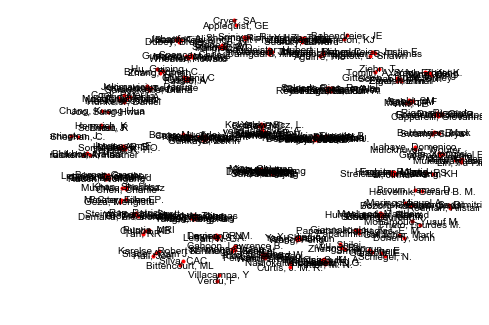

In [97]:
nx.draw_spring(coAuths, with_labels=True, font_size=10, node_size=10)

In [98]:
import community

In [102]:
coAuths = all_chem.networkCoAuthor()  # RC.networkCoAuthor()
print(mk.graphStats(coAuths))

Nodes: 109
Edges: 227
Isolates: 0
Self loops: 0
Density: 0.0385661
Transitivity: 0.973585


In [103]:
partition = community.best_partition(coAuths)
modularity = community.modularity(partition, coAuths)
print('Modularity:', modularity)

Modularity: 0.898545706371191


In [ ]:
nx.draw_spring(coAuths, node_color=[partition[n] for n in acn.nodes()], 
               cmap=plt.cm.Set2, with_labels=True, font_size=10, node_size=30, alpha=0.5)